## Prima parte
Implementare la DCT2 come spiegata a lezione in un ambiente open source a vostra scelta e confrontare i tempi di esecuzione con la DCT2 ottenuta usando la libreria dell’ambiente
utilizzato, che si presuppone essere nella versione fast (FFT). In particolare, procurarsi array quadrati N×N con N crescente e rappresentare su un grafico in scala semilogaritmica (le ascisse saranno le pure quantità scalari mentre le ordinate il logaritmo) al variare di N il tempo impiegato ad eseguire la DCT2 col vostro algoritmo fatto in casa e con l’algoritmo della libreria. I tempi dovrebbero essere proporzionali a N<sup>3</sup> per la DCT2 fatta in casa e a N<sup>2</sup> per la versione fast (più precisamente a N<sup>2</sup> log(N)). I tempi ottenuti con la versione

In [9]:
import numpy as np
import time
import matplotlib.pyplot as plt
from functions.dct2 import dct2_home_made
from scipy.fft import dctn

In [10]:
# FFT-2 transform using library
def fft2_scipy(x):
    X = dctn(x, norm='ortho')
    return X


# Function to measure execution time
def measure_time(func, x):
    start_time = time.time()
    func(x)
    end_time = time.time() - start_time
    return end_time

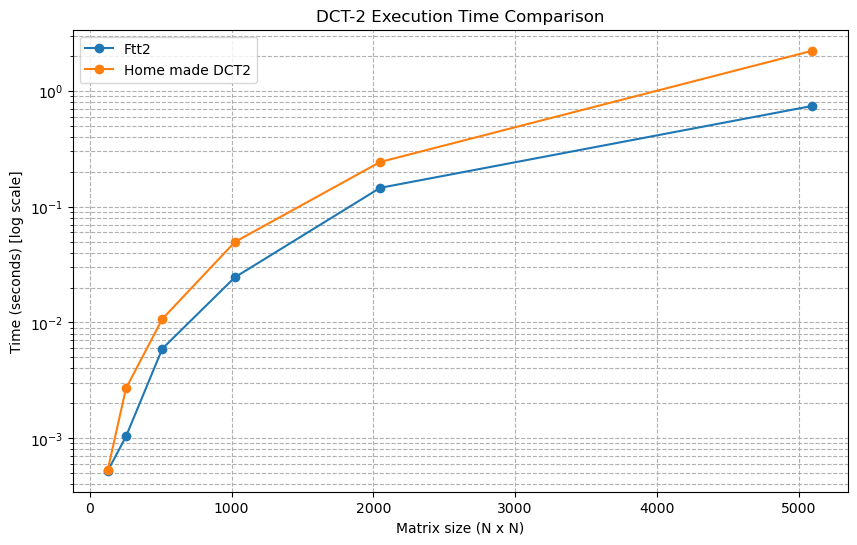

In [11]:
# Sizes of matrices
sizes = [128, 256, 512, 1024, 2048, 5096]

# Lists to store execution times
times_fft2 = []
times_dct2_home_made = []

for size in sizes:
    x = np.random.rand(size, size)
    
    # Measure time for home-made DCT2
    time_dct2_home_made = measure_time(dct2_home_made, x)
    times_dct2_home_made.append(time_dct2_home_made)

    time_fft2 = measure_time(fft2_scipy, x)
    times_fft2.append(time_fft2)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.semilogy(sizes, times_fft2, label='Ftt2', marker='o')
plt.semilogy(sizes, times_dct2_home_made, label='Home made DCT2', marker='o')
plt.xlabel('Matrix size (N x N)')
plt.ylabel('Time (seconds) [log scale]')
plt.title('DCT-2 Execution Time Comparison')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

In [12]:
# Test matrix
# array = np.array([
#     [231, 32, 233, 161, 24, 71, 140, 245],
#     [247, 40, 248, 245, 124, 204, 36, 107],
#     [234, 202, 245, 167, 9, 217, 239, 173],
#     [193, 190, 100, 167, 43, 180, 8, 70],
#     [11, 24, 210, 177, 81, 243, 8, 112],
#     [97, 195, 203, 47, 125, 114, 165, 181],
#     [193, 70, 174, 167, 41, 30, 127, 245],
#     [87, 149, 57, 192, 65, 129, 178, 228]
# ])
# print(dct2_home_made(array))
# print("*****")
# print(fft2_scipy(array))